[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/atom-position-finding/atom_position_finding.ipynb)

---

<img src="https://raw.githubusercontent.com/MLMI2-CSSI/foundry/main/assets/foundry-black.png" width=450>

# Foundry Atom Position Finding Tutorial for Beginners

This introduction uses Foundry to:


1.   Load HDF5 data from Foundry
2.   Visualize data inputs and groundtruth
3.   Load a predictive model from Foundry
4.   infer the atomic column positions in the input STEM images. 

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

<a target="_blank" href="https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/atom-position-finding/atom_position_finding.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
try:
    import google.colab
    no_local_server=True
    no_browser=True
    use_globus=False
except: # when not in google colab
    no_local_server=False
    no_browser=False
    use_globus=False

# Installing Foundry
First we'll need to install Foundry.


If you are running locally, it will install this module onto your machine if you do not already have it. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/atom-position-finding) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

# Importing Packages
Now we can import Foundry and Matplotlib so we can import the data and visualize it.

In [3]:
import matplotlib.pyplot as plt
from foundry import Foundry

# Instantiating `Foundry`
An instance of a `Foundry` client provides an access portal to all of the datasets made available through the foundry service. To fully utilize a `Foundry` client instance, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate a `Foundry` object using the code below. When you instantiate a `Foundry` instance locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate a `Foundry` instance on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [4]:
f = Foundry(no_local_server=no_local_server,
            no_browser=no_browser,
            use_globus=use_globus)

# Access a `FoundryDataset`

A `FoundryDataset` object is a container for a dataset hosted by the `Foundry` service. The `Foundry` client that we created above provides access via these `FoundryDataset` objects. One of the easiest ways to retrieve FoundryDataset objects is to use the `get_dataset(doi)` or `search(search string)` functions of the `Foundry` client. In this example, we will search for a specific dataset using it's DOI:

In [5]:
dataset_doi = '10.18126/e73h-3w6n'

# download the data 
ds = f.get_dataset(dataset_doi)
ds

# Load dataset


In [6]:
# load the HDF5 image data into a local object
res = ds.get_as_dict() # 233 MB download
res


{'train': {'input': {'imgs': <HDF5 group "/imgs" (299 members)>,
   'raw': <HDF5 group "/raw" (299 members)>,
   'metadata': <HDF5 group "/metadata" (2 members)>},
  'target': {'coords': <HDF5 group "/coords" (299 members)>}}}

In [7]:
# using the 'train' split, 'input' or 'target' type, and Foundry Keys specified by the dataset publisher
# we can grab the atom images, metadata, and coorinates we desire
imgs = res['train']['input']['imgs']
desc = res['train']['input']['metadata']
coords = res['train']['target']['coords']

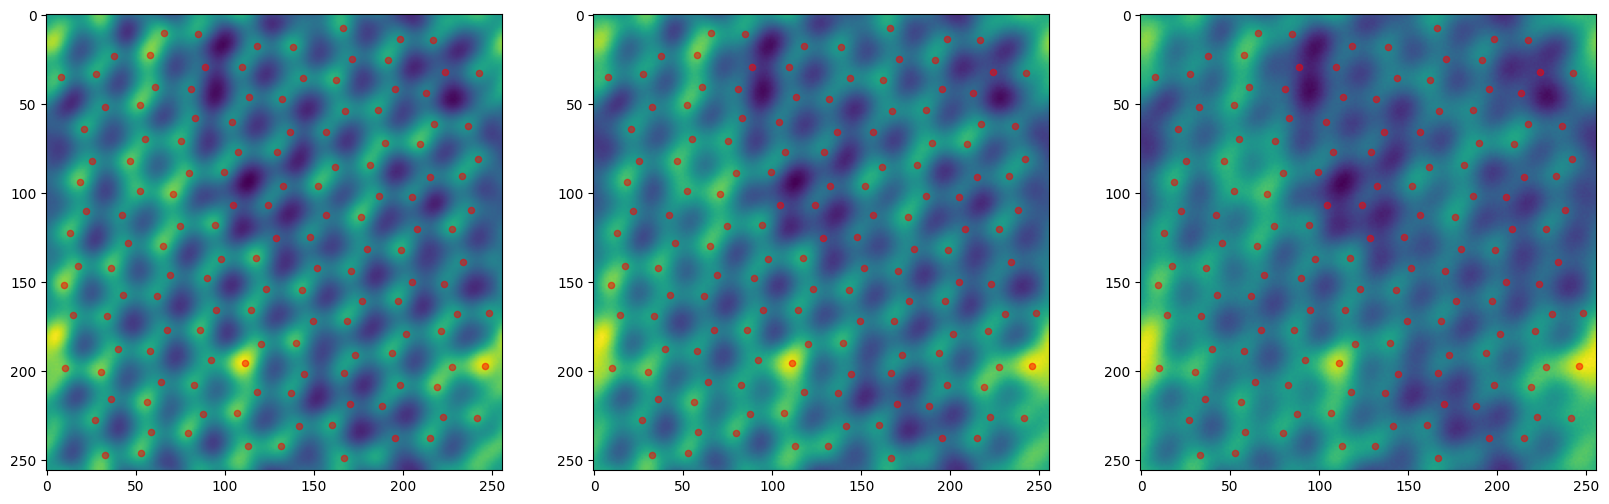

In [8]:
n_images = 3
offset = 150
key_list = list(res['train']['input']['imgs'].keys())[0+offset:n_images+offset]

fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
    axs[i].imshow(imgs[key_list[i]])
    axs[i].scatter(coords[key_list[i]][:,0], coords[key_list[i]][:,1], s = 20, c = 'r', alpha=0.5)